In [10]:
import os

zip_path = "/content/archive (4).zip"

# Check if the file exists
if os.path.exists(zip_path):
    print("File found:", zip_path)
else:
    print("File not found. Please re-upload it.")


File found: /content/archive (4).zip


In [11]:
import zipfile

extract_path = "/content/brain_tumor_dataset"

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed successfully! Dataset is available at:", extract_path)


Extraction completed successfully! Dataset is available at: /content/brain_tumor_dataset


In [12]:
import os

print("Extracted Files:", os.listdir(extract_path))


Extracted Files: ['brain_tumor_dataset', 'yes', 'no']


In [13]:
import os

dataset_path = "/content/brain_tumor_dataset"

# List main folders
print("Dataset structure:", os.listdir(dataset_path))


Dataset structure: ['brain_tumor_dataset', 'yes', 'no']


In [14]:
dataset_path = "/content/brain_tumor_dataset/brain_tumor_dataset"



In [15]:
import os

yes_images = os.listdir(dataset_path + "/yes")
no_images = os.listdir(dataset_path + "/no")

print("Number of Tumor Images:", len(yes_images))
print("Number of Non-Tumor Images:", len(no_images))

# Display some sample filenames
print("Tumor Image Example:", yes_images[:5])
print("Non-Tumor Image Example:", no_images[:5])


Number of Tumor Images: 155
Number of Non-Tumor Images: 98
Tumor Image Example: ['Y26.jpg', 'Y71.JPG', 'Y113.JPG', 'Y154.jpg', 'Y195.JPG']
Non-Tumor Image Example: ['N15.jpg', '3 no.jpg', 'No13.jpg', '27 no.jpg', '10 no.jpg']


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = dataset_path  # Updated dataset path

# Create ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode="binary",
    subset="training"
)

# Load validation data
val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode="binary",
    subset="validation"
)

print("Dataset is now ready for training!")


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Dataset is now ready for training!


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train the model
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5867 - loss: 0.8298 - val_accuracy: 0.6200 - val_loss: 0.6225
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6062 - loss: 0.6645 - val_accuracy: 0.6200 - val_loss: 0.5867
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 984ms/step - accuracy: 0.6186 - loss: 0.6539 - val_accuracy: 0.7400 - val_loss: 0.6226
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5856 - loss: 0.6925 - val_accuracy: 0.6400 - val_loss: 0.6422
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 985ms/step - accuracy: 0.5909 - loss: 0.6666 - val_accuracy: 0.7000 - val_loss: 0.5784
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6193 - loss: 0.6287 - val_accuracy: 0.6200 - val_loss: 0.6273
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 929ms/step - accuracy: 0.6258 - loss: 0.6495 - val_accuracy: 0.6200 - val_loss: 0.6055
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 949ms/step - accuracy: 0.6839 - loss: 0.6350 - val_accuracy: 0.7000

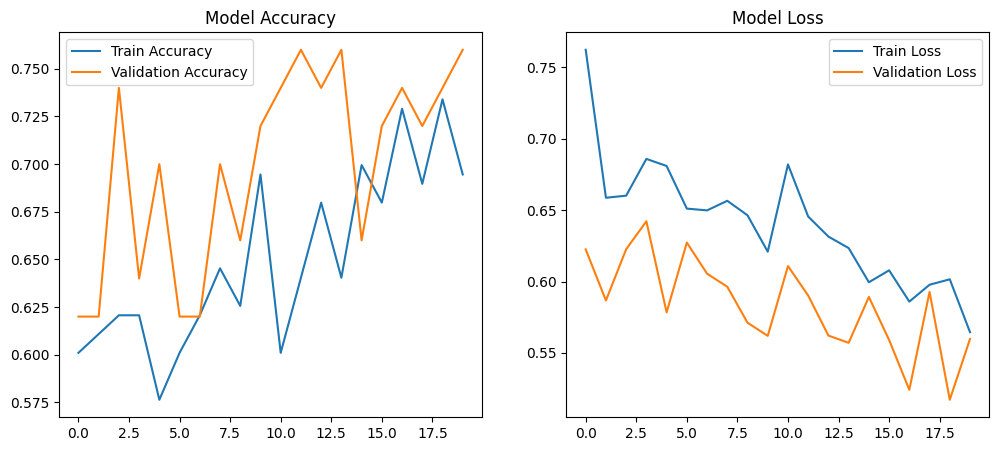

In [19]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


In [20]:
# Evaluate model on validation data
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.7578 - loss: 0.5804
Validation Accuracy: 78.00%


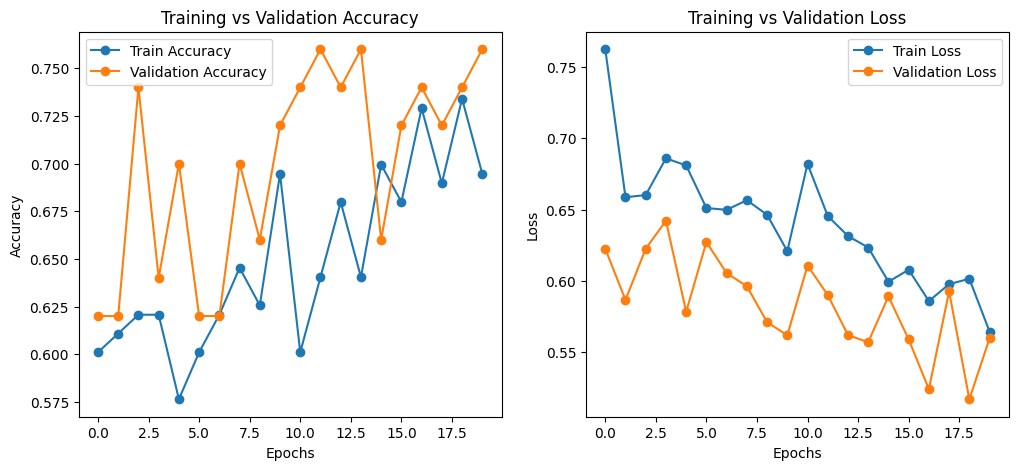

In [23]:
import matplotlib.pyplot as plt

# Plot accuracy & loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()


In [21]:
model.save("brain_tumor_cnn.h5")
print("Model saved successfully!")


Model saved successfully!


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step


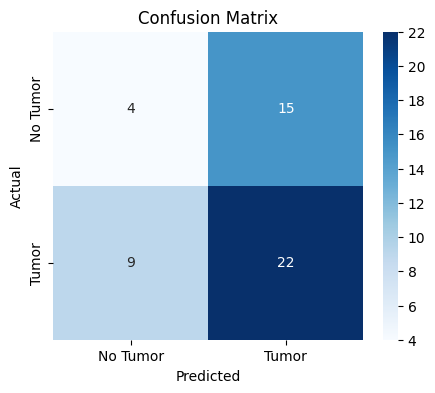

In [24]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get true labels and predictions
y_true = val_data.classes
y_pred = model.predict(val_data)
y_pred = np.round(y_pred).flatten()  # Convert probabilities to 0 or 1

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


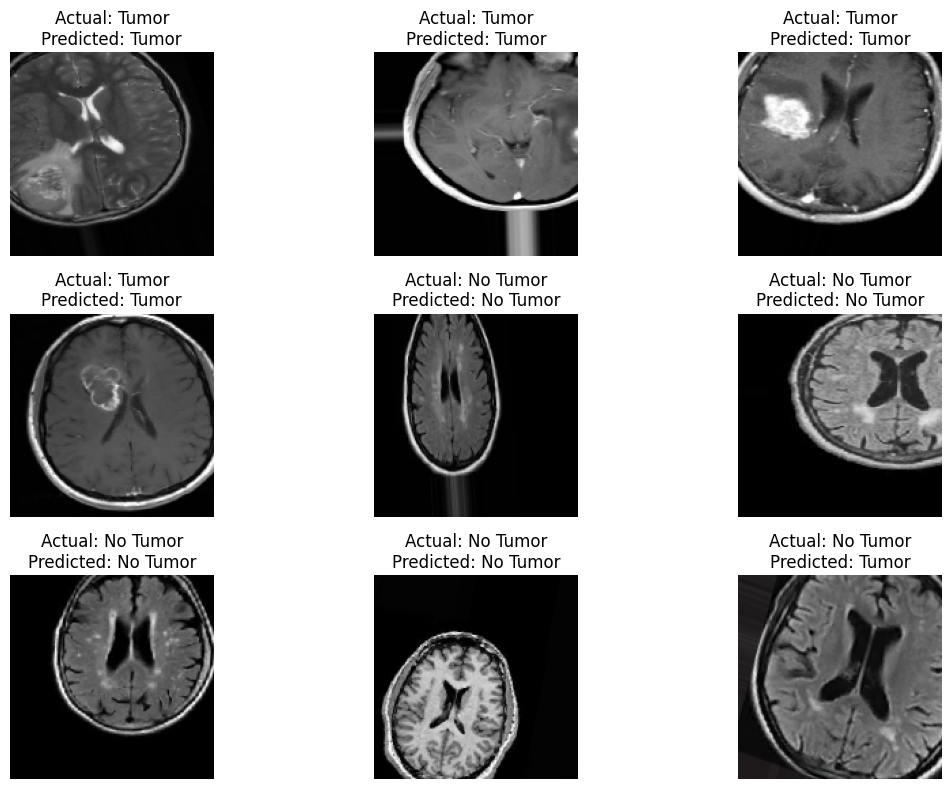

In [25]:
import random
from tensorflow.keras.preprocessing import image

# Select random images from the validation dataset
sample_images, sample_labels = next(val_data)

# Plot images with predictions
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i+1)

    img = sample_images[i]
    true_label = "Tumor" if sample_labels[i] == 1 else "No Tumor"

    # Predict
    img_expanded = np.expand_dims(img, axis=0)
    prediction = model.predict(img_expanded)
    predicted_label = "Tumor" if prediction[0][0] > 0.5 else "No Tumor"

    # Show image
    plt.imshow(img)
    plt.title(f"Actual: {true_label}\nPredicted: {predicted_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [22]:
import cv2
import numpy as np

# Load a test image
test_image_path = "/content/brain_tumor_dataset/brain_tumor_dataset/yes/Y71.JPG"  # Change this to any image path
img = cv2.imread(test_image_path)
img = cv2.resize(img, (150, 150))  # Resize to match model input size
img = img / 255.0  # Normalize
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img)

# Output result
if prediction[0][0] > 0.5:
    print("Prediction: 🚨 Tumor Detected")
else:
    print("Prediction: ✅ No Tumor Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Prediction: 🚨 Tumor Detected


In [26]:
# Save the trained model
model.save("brain_tumor_cnn.h5")
print("Model saved successfully!")


Model saved successfully!


In [30]:
model.save('/content/brain_tumor_cnn.h5')  # Saves in Colab session storage


In [31]:
from google.colab import files
files.download('/content/brain_tumor_cnn.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/brain_tumor_cnn.h5')  # Saves in Drive
